# Complete Data Pre-processing, Analysis of Titanic Dataset and Running Classification for Passenger Survival Prediction

 ##### 1. Preprocessing the legendary Titanic dataset
 * Running EDD
 * Imputing missing value
 * Dealing with outlier datapoints
 * Dropping irrelavent variables
 
##### 2. Running Different Classifiers & Gauging their performance

In [92]:
pwd

'C:\\Users\\shubh\\OneDrive\\Documents\\Udemy ML course\\My work'

#### Importing Libraries and Data

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\My Datasets\titanic.csv", header=0)

#### EDD and Univariant Analysis

In [95]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [97]:
df.shape

(1309, 12)

In [98]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.296304,0.377387
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.738888,0.484918
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [99]:
df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


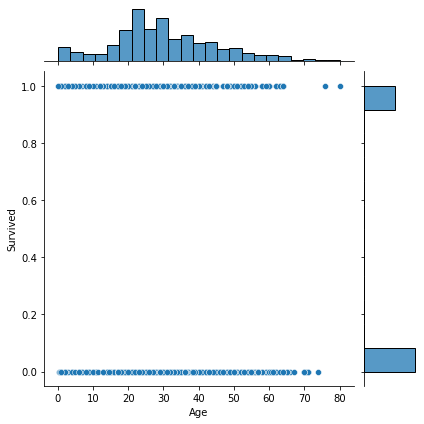

In [100]:
sns.jointplot(x="Age",y="Survived", data=df)

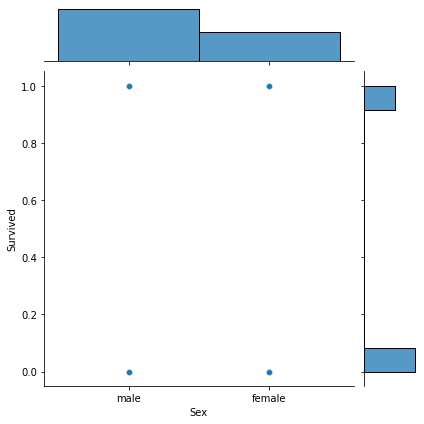

In [101]:
sns.jointplot(x="Sex",y="Survived", data=df)

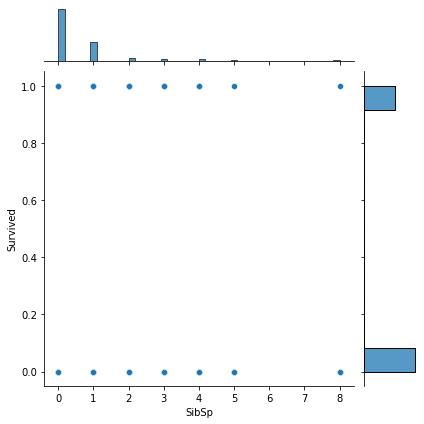

In [102]:
sns.jointplot(x="SibSp",y="Survived", data=df)

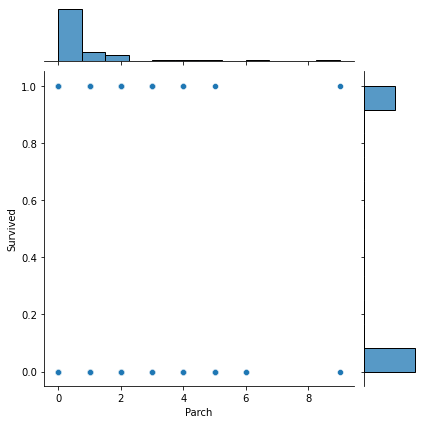

In [103]:
sns.jointplot(x="Parch",y="Survived", data=df)

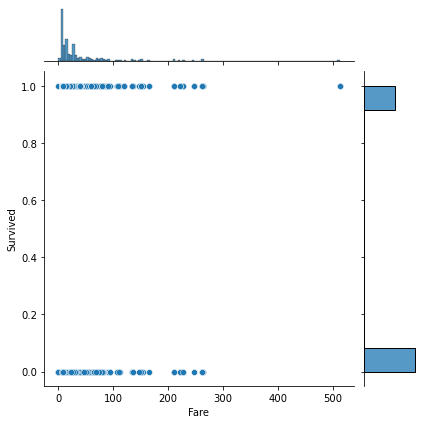

In [104]:
sns.jointplot(x="Fare",y="Survived", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

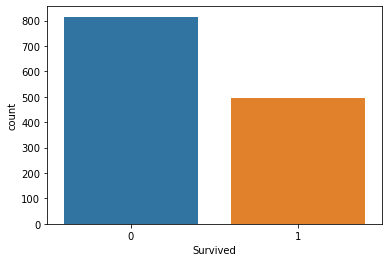

In [105]:
sns.countplot(x="Survived", data=df)

##### EDD & Univariant analysis Inference
* Missing values in Age, Fare, Cabin

#### Missing value imputation

In [106]:
df["Age"] = df.Age.fillna(df.Age.mean())

In [107]:
df["Fare"] = df.Fare.fillna(df.Fare.mean())

No of values in Cabin are two low to be imputed and if forced might hinder the results in adverse way so we drop the column Cabin

In [108]:
del df["Cabin"]

#### Variable Transformation and Deletion 

Here we can understad that A passenger's name or his ticket no. will have no real impact on Survival chances so we can drop those columns

In [109]:
del df['Name']

In [110]:
del df['Ticket']

In [111]:
del df['PassengerId']

In [112]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


#### Dummy Variable Creation

In our dataframe we have two columns which have catagorical values which we have to convert into numerical values that is we have to create dummy variable for them

In [113]:
df=pd.get_dummies(df)

In [114]:
df.head(2)

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0


No of dummy variable has to be one less than no of categories so we can 1 dummy column each from created ones
that is one column from created Sex dummies and one column from Embarked Dummies according to full negative corelation

In [115]:
del df['Sex_female']

In [116]:
del df['Embarked_S']

In [117]:
df.head(2)

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.2500,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,1,0


### Logistic Regression
will be building the logistic regression model using 2 libraries statsmodel and sklearn. statsmodel since it gives us more statistical information which helps us improving our model and the final implementatin will be done in Sklearn since its lot reliable and has wide doccumentation for refrence than statsmodel since its a relatively new library and has a few bugs 

Using sklearn single predictor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [118]:
X= df[['Pclass']]

In [119]:
y= df[['Survived']]

In [120]:
X.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [121]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [122]:
 from sklearn.linear_model import LogisticRegression

In [123]:
clf_lrs = LogisticRegression()

In [124]:
clf_lrs.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [125]:
clf_lrs.coef_

array([[-0.65087283]])

In [126]:
clf_lrs.intercept_

array([0.96336566])

using statsmodel

In [127]:
import statsmodels.api as sn

In [128]:
X_cons = sn.add_constant(X)

In [129]:
import statsmodels.discrete.discrete_model as sm

In [130]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.627911
         Iterations 5


In [131]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1307
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                 0.05260
Time:                        00:03:08   Log-Likelihood:                -821.94
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                 1.259e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9704      0.165      5.869      0.000       0.646       1.294
Pclass        -0.6540      0.070     -9.378      0.000      -0.791      -0.517
==============================================================================
"""

Using sklearn multiple predictors

In [132]:
X= df.loc[:,df.columns != "Survived"]

In [133]:
y= df["Survived"]

In [134]:
clf_lr = LogisticRegression()

In [135]:
clf_lr.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
clf_lr.coef_

array([[-9.17655688e-01, -3.17062806e-02, -2.82779657e-01,
        -7.70220887e-02,  2.54081991e-03, -3.61362157e+00,
         1.46567020e-01,  2.14317709e-01]])

In [137]:
clf_lr.intercept_

array([4.68611862])

Using statsmodel multiple predictor

In [138]:
X_cons = sn.add_constant(X)

In [139]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.367850
         Iterations 7


In [140]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1300
Method:                           MLE   Df Model:                            8
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                  0.4450
Time:                        00:03:08   Log-Likelihood:                -481.52
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                2.114e-161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9076      0.492      9.982      0.000       3.944       5.871
Pclass        -0.9683      0.133     -7.288      0.000      -1.229      -0.708
Age           -0.0333      0.007     -4.664      0.000      -0.047      -0.019
SibSp         -0.2912      0.093     -3.118      0.002      -0.474      -0.108
Parch         -0.0855      0.099     -0.866      0.386      -0.279       0.108
Fare           0.0022      0.002      1.103      0.270      -0.002       0.006
Sex_male      -3.7400      0.190    -19.709      0.000      -4.112      -3.368
Embarked_C     0.2259      0.216      1.048      0.295      -0.197       0.649
Embarked_Q     0.3651      0.301      1.213      0.225      -0.225       0.955
==============================================================================
"""

#### Creating Confusion Matrix

In [141]:
clf_lr.predict_proba(X)

array([[0.93353897, 0.06646103],
       [0.06859148, 0.93140852],
       [0.24435968, 0.75564032],
       ...,
       [0.94698663, 0.05301337],
       [0.93133863, 0.06866137],
       [0.94182239, 0.05817761]])

In [142]:
y_pred = clf_lr.predict(X)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [143]:
y_pred_3 = (clf_lr.predict_proba(X)[:,1]>=0.6)

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred_3)

array([[748,  67],
       [118, 376]], dtype=int64)

In [145]:
y_pred_3

array([False,  True,  True, ..., False, False, False])

 Gauging Performance of the classifier

In [146]:
from sklearn.metrics import precision_score, recall_score

In [147]:
precision_score(y, y_pred_3)

0.8487584650112867

In [148]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_score(y_test, clf_lr.predict(X_test))

0.8702290076335878

In [150]:
recall_score(y, y_pred_3)

0.7611336032388664

In [151]:
from sklearn.metrics import roc_auc_score,plot_roc_curve

In [152]:
roc_auc_score(y, y_pred_3)

0.8394625071409056

### LDA (Linear Discriminant Analysis)

LDA shows great advantage over Logistic regression when we have multiple prediction classes(>2) and we need to run inferantial classification analysis that is we need more information about how each independent variable is affecting prediction class. Also LDA shines when the independent variable values are normalized. Since none of of these cases are satified in this problem statement LDA wont show noticable performance gain over Logistic Regression 

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [154]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [155]:
y_pred_lda = y_pred_3 = (clf_lda.predict_proba(X)[:,1]>=0.8)

In [156]:
confusion_matrix(y,y_pred_lda)

array([[747,  68],
       [119, 375]], dtype=int64)

In [157]:
precision_score(y, y_pred_lda)

0.8465011286681715

In [158]:
recall_score(y, y_pred_lda)

0.7591093117408907

In [159]:
roc_auc_score(y, y_pred_lda)

0.8378368644594024

In [185]:
accuracy_score(y, y_pred_lda)

0.8571428571428571

In [186]:
accuracy_score(y_test, clf_lda.predict(X_test))

0.8702290076335878

In [161]:
clf_lda.coef_

array([[-1.02900755e+00, -3.57911217e-02, -3.04627811e-01,
        -8.93046470e-02,  2.54826807e-03, -5.92294476e+00,
         2.53183869e-01,  4.39506576e-01]])

In [162]:
clf_lda.intercept_

array([6.18554943])

### KNN (K-Nearest Neighbours Classifier) 

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [165]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1047, 8) (262, 8) (1047,) (262,)


In [166]:
from sklearn import preprocessing

In [167]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [168]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [169]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [170]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[115,  31],
       [ 22,  94]], dtype=int64)

In [171]:
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

0.7977099236641222

In [172]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)
accuracy_score(y_test, clf_knn_3.predict(X_test_s))

0.8435114503816794

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30]}

In [175]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [176]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [178]:
grid_search_cv.best_params_

{'n_neighbors': 10}

In [179]:
optimised_KNN = grid_search_cv.best_estimator_

In [180]:
y_test_pred = optimised_KNN.predict(X_test_s)

In [181]:
confusion_matrix(y_test,y_test_pred)

array([[133,  13],
       [ 18,  98]], dtype=int64)

In [182]:
accuracy_score(y_test, y_test_pred)

0.8816793893129771

After Running all the model on the dataset we got accuracies as follows

* Logistic Regression:87.0229%
* Linear Discriminant Analysis:87.0229%
* KNN:88.1679%